In [31]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
%matplotlib inline


In [1]:
import pandas as pd

In [2]:
data = {
    "ID": list(range(1, 16)),
    "productDisplayName": [
        "Turtle Check Men Blue Shirt",
        "Cotton Women Red Dress",
        "Striped Men Green T-shirt",
        "Floral Women Yellow Blouse",
        "Plaid Men Brown Pants",
        "Polka Dot Women Pink Skirt",
        "Linen Men Black Jacket",
        "Chiffon Women Purple Blouse",
        "Gingham Men Orange Shorts",
        "Silk Women White Dress",
        "Denim Men Navy Blue Jeans",
        "Lace Women Beige Top",
        "Corduroy Men Gray Pants",
        "Satin Women Teal Dress",
        "Wool Men Burgundy Sweater"
    ]
}

df = pd.DataFrame(data)

In [3]:
print(df)

    ID           productDisplayName
0    1  Turtle Check Men Blue Shirt
1    2       Cotton Women Red Dress
2    3    Striped Men Green T-shirt
3    4   Floral Women Yellow Blouse
4    5        Plaid Men Brown Pants
5    6   Polka Dot Women Pink Skirt
6    7       Linen Men Black Jacket
7    8  Chiffon Women Purple Blouse
8    9    Gingham Men Orange Shorts
9   10       Silk Women White Dress
10  11    Denim Men Navy Blue Jeans
11  12         Lace Women Beige Top
12  13      Corduroy Men Gray Pants
13  14       Satin Women Teal Dress
14  15    Wool Men Burgundy Sweater


In [17]:
colors = ['orange', 'purple', 'pink', 'yellow', 'white', 'silver', 'black', 'brown', 'grey', 'blue', 'green', 'red']


# Create a regular expression pattern from the colors list
pattern = '|'.join(colors)

df["productDisplayName"] = df["productDisplayName"].str.lower()

import re

# Create a regular expression pattern from the colors list
pattern = r"\b(" + '|'.join(colors) + r")\b"

# Use str.contains() to check if the "productDisplayName" contains any of the colors
df['color'] = df['productDisplayName'].str.extract(pattern)

df.dropna(inplace=True)
df_just_colors = pd.DataFrame(index=df.index)


df_just_colors["id"] = df["ID"]
df_just_colors["color"] = df["color"]

df_just_colors

,color,id
0,blue,1
1,red,2
2,green,3
3,yellow,4
4,brown,5
5,pink,6
6,black,7
7,purple,8
8,orange,9
9,white,10


In [2]:
from PIL import Image
from pathlib import Path
import numpy as np

In [22]:
def showBatch(data_loader):
    for images, labels in data_loader:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.imshow(makeGrid(images, nrow = 16).permute(1, 2, 0))
        ax.axis('off')
        break

In [23]:
def showSample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')

In [24]:
def plotAccuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')


In [25]:
def plotLosses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

In [26]:
def predictImage(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [4]:
os.chdir('..')


In [5]:
path = os.getcwd()
path

'/Users/tfai/Documents/GitHub/Vision'

In [32]:
data_path  = path+'/input/digikala'

sorting_classes = os.listdir(data_path)

if '.DS_Store' in sorting_classes:
  sorting_classes.remove('.DS_Store')

In [33]:
print(sorting_classes)

['brown', 'green', 'blue', 'silver', 'grey', 'pink', 'red', 'purple', 'yellow', 'white', 'black', 'orange']


In [9]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [48]:
transformations = transforms.Compose([transforms.Resize((224, 224)), 
                                      transforms.ToTensor()])

dataset = ImageFolder(data_path, transform = transformations)


In [34]:
def loadImageLabels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(data_path+"/"+category):
            img = cv2.imread(data_path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 224 x 224 because the input image resolution for AlexNet is 224 x 224
            resized_img = img_array.resize((224, 224))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels


In [36]:
images, labels = loadImageLabels(sorting_classes)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  6239 
No. of labels loaded =  6239
<class 'list'> <class 'list'>


In [37]:
images = np.array(images)
labels = np.array(labels)


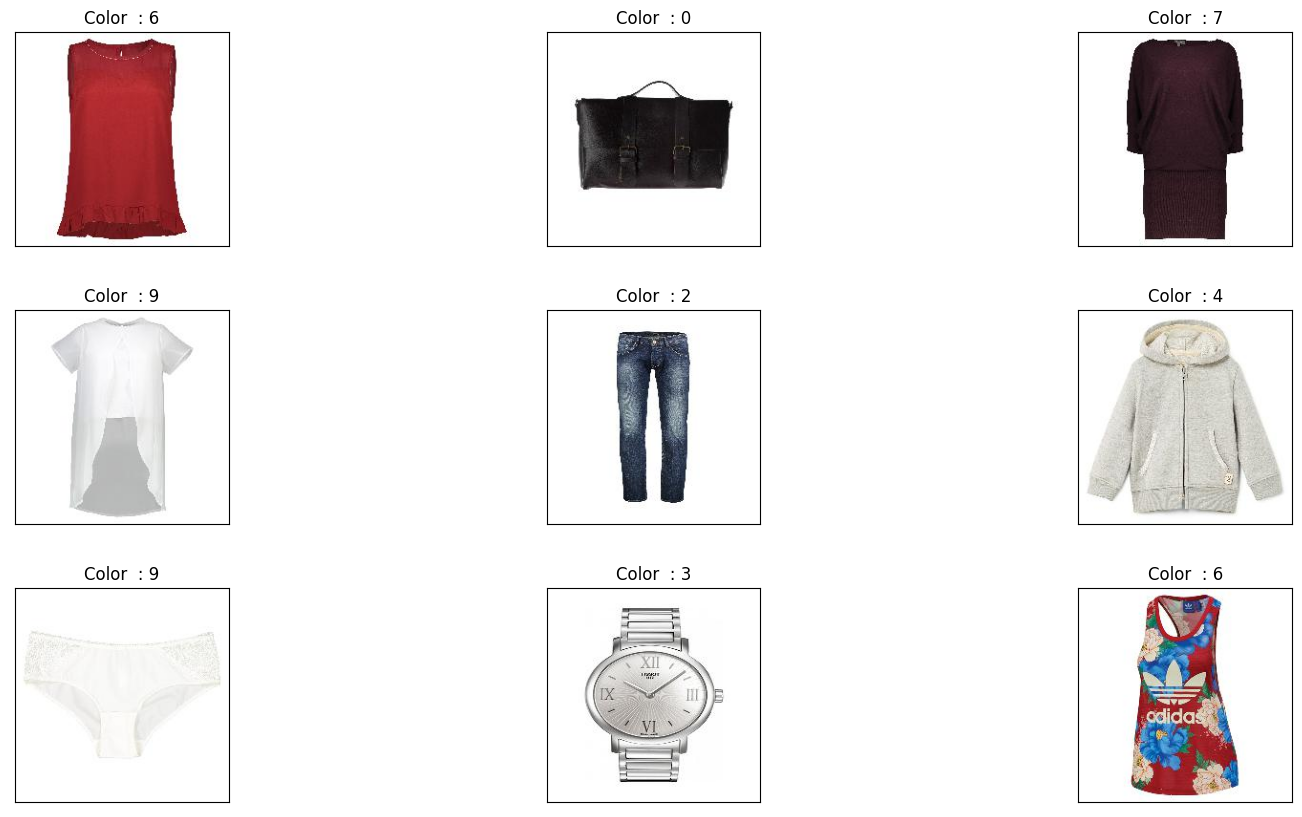

In [39]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Color  : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [40]:
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(32)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)



'n' values before shuffling =  [   0    1    2 ... 6236 6237 6238]

'n' values after shuffling =  [5139 3967 5072 ... 1334 1579 2775]


In [41]:
#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]


In [42]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255

In [44]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 32)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [46]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="same",activation="relu",input_shape=(224,224,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="same",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(12,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                      

In [47]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
156/156 [==============================] - 148s 937ms/step - loss: 1.9789 - accuracy: 0.4089
Epoch 2/100
156/156 [==============================] - 161s 1s/step - loss: 1.4383 - accuracy: 0.5538
Epoch 3/100
156/156 [==============================] - 168s 1s/step - loss: 1.3008 - accuracy: 0.5865
Epoch 4/100
156/156 [==============================] - 162s 1s/step - loss: 1.2354 - accuracy: 0.6149
Epoch 5/100
156/156 [==============================] - 174s 1s/step - loss: 1.1339 - accuracy: 0.6319
Epoch 6/100
156/156 [==============================] - 165s 1s/step - loss: 1.1512 - accuracy: 0.6283
Epoch 7/100
156/156 [==============================] - 168s 1s/step - loss: 1.1140 - accuracy: 0.6387
Epoch 8/100
156/156 [==============================] - 169s 1s/step - loss: 1.0285 - accuracy: 0.6658
Epoch 9/100
156/156 [==============================] - 170s 1s/step - loss: 1.0359 - accuracy: 0.6608
Epoch 10/100
156/156 [==============================] - 165s 1s/step - loss: 1.

KeyboardInterrupt: 